<a href="https://colab.research.google.com/github/duchaba/python_graphs_p2go/blob/master/Python_Graphs_p2go.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# OPTIONAL
# For Google Colab, (1) Open the "concole", e.g. right-click and inspect, (2) Copy the below scripts and run it.
#
# If you know how to hack Google Colab Jupyter notebook and run "javascripts" as-is below, 
#i.e., without the need for opening up the console, please share it with me.
#
# The Javascript is to highlight the code cells' input and output and the code-cells you have executed.
#
%%js
var head = document.head || document.getElementsByTagName("head")[0];
var style = document.createElement("style");
var css = ".inputarea.code{border-left: 4px solid #20c997;}.cell.focused .inputarea.code{border-left: 4px solid #d63384;}.cell .output{border-left: 4px solid #ffc107;}";
css = css + ":root { --colab-fresh-execution-count-color: #d63384;}";
css = css + ".markdown blockquote {border-left: 10px solid #fd7e14 !important;border-radius: 10px 0 0 10px;padding: 1em 1em 1em 1em;border-bottom: 1px solid #343845;}"
css = css + " h1,h2,h3,h4,h5 {font-family:serif !important;}"
css = css + "h1{color:#e83e8c !important;;} h2{color:#20c997 !important;font-size:120%;} h3{color:#fd7e14 !important;font-size:120%;} h4{color:#6610f2 !important;}"
head.appendChild(style);
style.type = "text/css";
style.appendChild(document.createTextNode(css));

<IPython.core.display.Javascript object>

# 1 - Introduction

Welcome to the "Python 2D Graphs" (p2go) project. It is a hackable, step-by-step for creating a 2D graph Python-object. 

I classify the "p2go" as a "sandbox" or "toy" project. In other words, it is a fun, experimental project focusing on solving one problem. The problem is I spend a lot of time studying data, e.g., images, text, and audio. I am fatigued from using other people's graphs or library packages, e.g., Bokeh or Ggplot2. I want to build my own using "numpy" and "matplotlib."

I intend to create more charts and use "p2go" to plot graphs that are not in books, whitepapers, or blogs. It doesn't matter if the benefits are immediately apparent, such as why satisfy drawing the "Imagenet Cosine Proximity" chart like everyone else. Why not graph the "Image Tangent Proximity" chart or throw in the Softmax function before creating the graph? 

The salient point is, why not do it yourself. You can start with a fun sandbox project, learn the basics, and improve your original-thinking rather than memorizing terminology and regurgitating how other people are doing it. 



><center><h2><i>So if you are ready, let's take a collective calming breath …  … and begin.</i></h2></center>

# 2 - The Journey

- As a good little programmer, we start by creating an object or class.

- When importing "numpy" and "matplotlib," my programing style is NOT using the global-space as in "import numpy *" NOR using the shorten name like "import matplotlibl.pyplot as ptl." I am NOT using Python's syntax shortcut because I'm switching between Python, Javascripts, and Swift. 

- I use a notebook to interactively writing the code, and afterward, I copy the code into a Python project using Atom IDE. https://atom.io/

In [ ]:
import numpy
import matplotlib

In [ ]:
class p2go(object):
  #
  # initialize the object
  def __init__(self):
    self.author = "Duc Haba"
    self.name = "Snoopy"
    self._ph()
    self._pp("Hello from", self.__class__.__name__)
    self._pp("Author is", self.author)
    self._ph()
    return
  #
  # pretty print output name-value line
  def _pp(self, a, b):
    print("%40s : %s" % (str(a), str(b)))
    return
  #
  # pretty print the header or footer lines
  def _ph(self):
    print("-" * 40, ":", "-" * 40)
    return
  #
# ---end of p2go class

- Typically, I named my object after my dog companion, e.g., "snoopy", "ducky" or "monty," but be warned, don't call it after your cat, because a "cat" will not follow any commands. 

In [ ]:
snoopy = p2go()

---------------------------------------- : ----------------------------------------
                              Hello from : p2go
                               Author is : Duc Haba
---------------------------------------- : ----------------------------------------


- The following is a clean version. I clean up the tried-and-errors cells, but please don't let it stop you from inserting your code-cells as we make this journey together. I encourage you to hack this notebook as you follow along.

- **Note:** When copying the code into the Adam's project, I would add the method(s) when defining the class, but in a notebook, we can hack-it and add new functions as need it.  

In [ ]:
# Hack it!
# add_method() is copy from Michael Garod's blog, 
# https://medium.com/@mgarod/dynamically-add-a-method-to-a-class-in-python-c49204b85bd6
# AND correction by: Филя Усков
#
import functools
def add_method(cls):
  def decorator(func):
    @functools.wraps(func) 
    def wrapper(self, *args, **kwargs): 
      return func(self,*args, **kwargs)
    setattr(cls, func.__name__, wrapper)
    return func # returning func means func can still be used normally
  return decorator

- We begin by teaching <u>*snoopy {or your companion-name}*</u> three tricks.

1. Fetch random data and test it.

2. Fetch the canvas from matplotlib.

3. See colors. 

  - *An ancillary note is that dog can see the shade of blue and yellow, but I think Snoopy can do better :-)*

4. Draw a line graph and test it.

In [ ]:
@add_method(p2go)
def fetch_data(self,siz=8):
  mx = numpy.ones((siz,2)) # 8 (or siz) by 2 matrix, i.e. 8 points for "x and y" coordinate
  mx[:,0] = numpy.arange(0,siz,1) # set x-coordinate to be zero through seven
  mx[:,1] = numpy.random.randint(0,siz,size=siz) # set y-coor to be random between zero and ten
  return mx

# test it
coor = snoopy.fetch_data()
snoopy._ph()
snoopy._pp("Coorinate data", coor)
snoopy._pp("Good boy", "You're a good boy!")
snoopy._ph()

---------------------------------------- : ----------------------------------------
                          Coorinate data : [[0. 4.]
 [1. 6.]
 [2. 4.]
 [3. 7.]
 [4. 5.]
 [5. 6.]
 [6. 3.]
 [7. 0.]]
                                Good boy : You're a good boy!
---------------------------------------- : ----------------------------------------


In [ ]:
# fetch canvas
# return: figure (the canvas) and axes (a picture within a canvas). 
# A canvas can have multiple pictures.
@add_method(p2go)
def fetch_canvas(self, row=1,col=1,siz=(12,9)):
  return matplotlib.pyplot.subplots(row, col, figsize=siz) 


In [ ]:
# see bootstrap default colors
@add_method(p2go)
def see_color(self):
  self.color_green = "#28a745"
  self.color_indigo = "#6610f2"
  self.color_teal = "#20c997"
  self.color_pink = "#e83e8c"
  self.color_cyan = "#17a2b8"
  self.color_red = "#dc3545"
  self.color_blue = "#007bff"
  self.color_orange = "#fd7e14"
  self.color_yellow = "#ffc107"
  self.color_purple = "#6f42c1"
  self.color_gray900 = "#212529"
  self.color_gray800 = "#343a40"
  self.color_gray700 = "#495057"
  self.color_gray500 = "#adb5bd"
  self.color_gray200 = "#e9ecef"
  cm = matplotlib.pyplot.get_cmap("rainbow")
  self.color_rainbow = cm(numpy.arange(1,250,5)) # take 50 colors in the rainbow
  cm = matplotlib.pyplot.get_cmap("gist_earth")
  self.color_earthy = cm(numpy.arange(1,250,5)) # take 50 colors in the earthy tone
  cm = matplotlib.pyplot.get_cmap("Set2")
  self.color_pastel = cm(numpy.arange(1,20,1)) # take 20 colors in the pastel
  return  
#
# do it
snoopy.see_color()

In [ ]:
#
# draw picture frame info. 
@add_method(p2go)
def draw_graph_frame(self,axe,is_grid,lab,cnt=1):
  axe.set_title(lab, fontsize=18, color=self.color_blue)
  axe.set_xlabel("x-values, Total Count: " + str(cnt), fontsize=18, color=self.color_pink)
  axe.set_ylabel("y-values", fontsize=18, color=self.color_teal)
  axe.tick_params(labelcolor=self.color_orange, labelsize="small")
  if is_grid:
    axe.grid()
  axe.axhline(y=0, color=self.color_blue)
  axe.axvline(x=0, color=self.color_blue)
  return
#
# draw a line graph
@add_method(p2go)
def draw_graph_line(self, axe, mx,is_grid=True,lab="2D Graph"):
  #
  # set up picture frame
  x = mx[:,0]
  y = mx[:,1]
  self.draw_graph_frame(axe,is_grid,lab, cnt=len(x))
  #
  # draw it
  axe.plot(x, y, color=self.color_pink)
  return

---------------------------------------- : ----------------------------------------
                                  Snoopy : Like to draw.
---------------------------------------- : ----------------------------------------


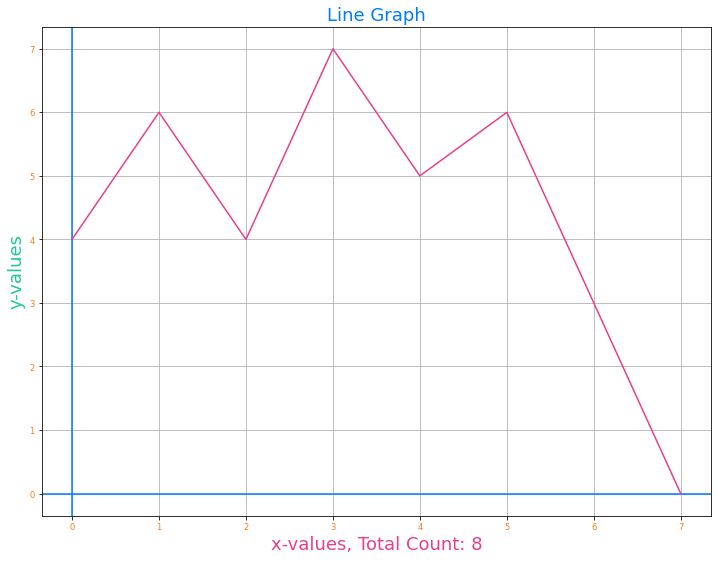

In [ ]:
# testing snoopy new trick
snoopy._ph()
snoopy._pp("Snoopy", "Like to draw.")
snoopy._ph()
#
canvas, pic = snoopy.fetch_canvas()
snoopy.draw_graph_line(pic,coor,lab="Line Graph")
canvas.show()

- Snoopy (p2go) has a basic drawing charts structure, so it is easy to add a new type of chart.

- We will teach Snoopy two more types of tricks as follows. The only difference from the previous method is the one-line of code. It is from "axe.plot()" to "axe.scatter()"

1. Draw a scatter graph.

2. Draw a line graph with dots as highlighting the points.

3. Ask Snoopy to draw two graphs side by side in one canvas.

In [ ]:
# draw a scatter graph
@add_method(p2go)
def draw_graph_scatter(self, axe, mx,is_grid=True,lab="2D Graph"):
  #
  # set up picture frame
  x = mx[:,0]
  y = mx[:,1]
  self.draw_graph_frame(axe,is_grid,lab, cnt=len(x))
  #
  # draw it
  axe.scatter(x, y, color=self.color_blue)
  return
#
#
# draw a line graph with dots
@add_method(p2go)
def draw_graph_line_with_dots(self, axe, mx,is_grid=True,lab="2D Graph"):
  #
  # set up picture frame
  x = mx[:,0]
  y = mx[:,1]
  self.draw_graph_frame(axe,is_grid,lab, cnt=len(x))
  #
  #
  # draw it
  axe.plot(x, y, color=self.color_pink)
  axe.scatter(x, y, color=self.color_blue)
  return

---------------------------------------- : ----------------------------------------
                                  Snoopy : Draws two graphs side by side.
---------------------------------------- : ----------------------------------------


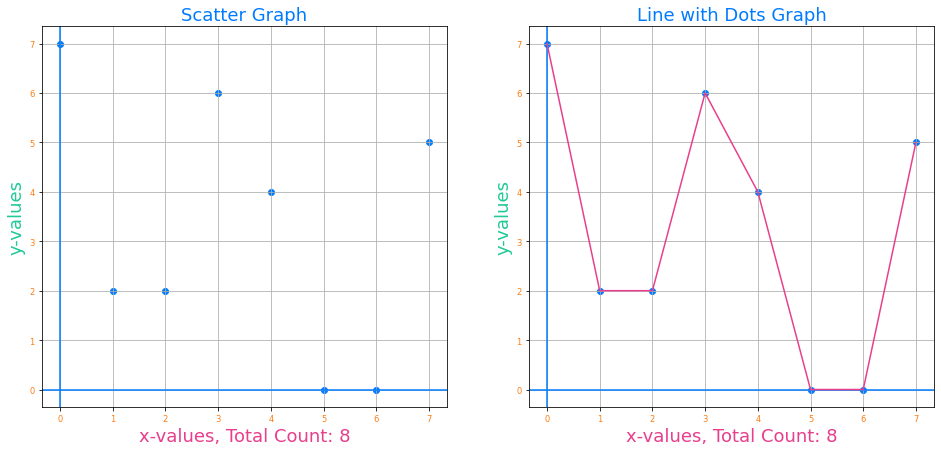

In [ ]:
# Ask Snoopy to do his new tricks.
# Using the same coordinate-matrix as in previous graph
snoopy._ph()
snoopy._pp("Snoopy", "Draws two graphs side by side.")
snoopy._ph()
# 
# create canvas with two pictures side by side
canvas, pic = snoopy.fetch_canvas(row=1,col=2,siz=(16,7))
snoopy.draw_graph_scatter(pic[0],coor,lab="Scatter Graph")
snoopy.draw_graph_line_with_dots(pic[1],coor,lab="Line with Dots Graph")
canvas.show()

- That was too easy. We will add a bar-chart, and for more fun, we will add a hand-drawn style. Just as before, the code difference in the new methods is small. Are you inspired to write or extend "p2go" yet? 

- For the stacked bar graph, the critical parameter is "bottom," starting with zero. The second graph, "bottom," sits on top of the first graph, and if we have a third set, then its bottom value is the sum of the first and second graph values.

- For the hand-drawn charts, it is as easy as adding one code-line and call the previous draw graph method. It is the "matplotlib.pyplot.xkcd()" statement.

In [ ]:
# draw a bar graph
@add_method(p2go)
def draw_graph_bar(self, axe, mx,is_grid=True,lab="2D Graph", is_cmap=True,is_stacked=False):
  #
  # set up picture frame
  if (is_stacked):
    x1 = numpy.arange(0, len(mx[:,0]), 1)
  x = mx[:,0]
  y = mx[:,1]    
  self.draw_graph_frame(axe,is_grid,lab, cnt=len(x))
  #
  # extra set up
  if (len(x) < 25):
    edg = 1
  else:
    edg = 0
  if (is_cmap):
    cox = self.color_rainbow
  else:
    cox = self.color_pink
  # draw it
  if (is_stacked):
    axe.bar(x1, x, bottom=0, linewidth=edg, edgecolor=self.color_gray800, color=self.color_pink)
    axe.bar(x1, y, bottom=x, linewidth=edg, edgecolor=self.color_gray800, color=self.color_teal)
    pass
  else:
    axe.bar(x, y, linewidth=edg, edgecolor=self.color_gray800, color=cox)
  return


In [ ]:
# add in hand-drawn bar chart
@add_method(p2go)
def draw_graph_bar_hand_drawn(self, axe, mx,is_grid=False,lab="Hand-drawn 2D Graph", is_cmap=True,is_stacked=False):
  with matplotlib.pyplot.xkcd():
    self.draw_graph_bar(axe, mx,is_grid,lab, is_cmap,is_stacked)
  return
#
#
@add_method(p2go)
def draw_graph_line_with_dots_hand_drawn(self, axe, mx,is_grid=False,lab="Hand-drawn 2D Graph"):
  with matplotlib.pyplot.xkcd():
    self.draw_graph_line_with_dots(axe, mx,is_grid,lab)
  return

---------------------------------------- : ----------------------------------------
                                  Snoopy : Draws bar chart and hand-drawn graph.
---------------------------------------- : ----------------------------------------


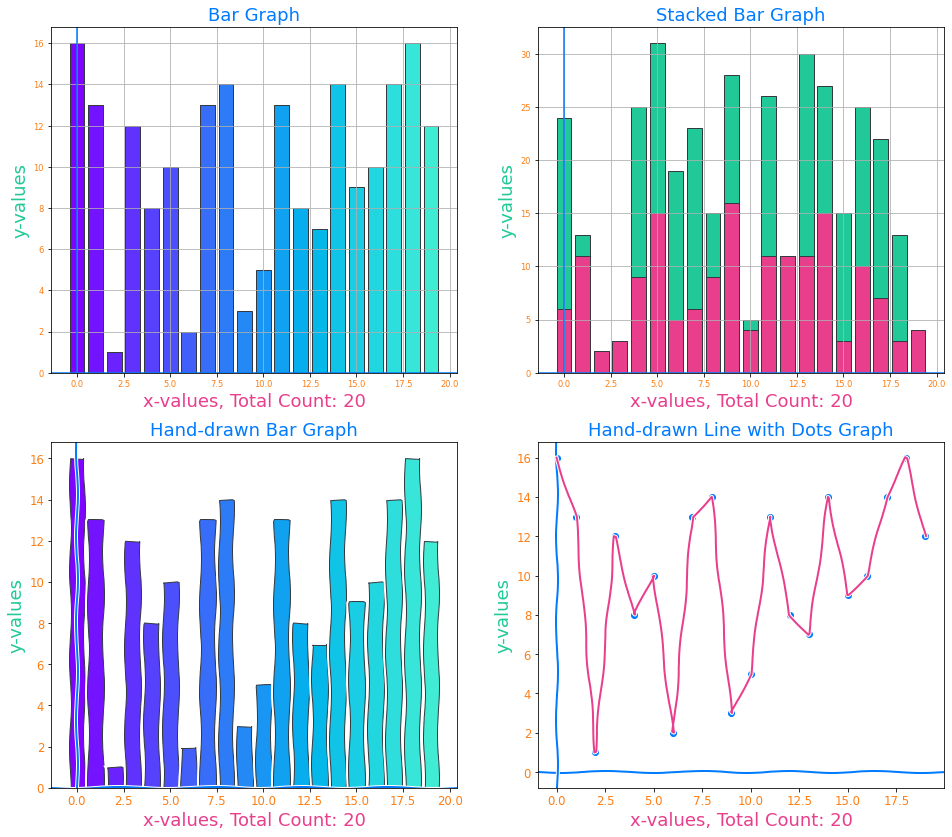

In [ ]:
# Ask Snoopy to do his new tricks.
snoopy._ph()
snoopy._pp("Snoopy", "Draws bar chart and hand-drawn graph.")
snoopy._ph()
# 
# fetch new set of random coordinate
coor1 = snoopy.fetch_data(20)
coor2 = snoopy.fetch_data(20)
coor2[:,0] = numpy.random.randint(1,20,size=20)
#
# create canvas with four pictures, 2x2 size.
canvas, pic = snoopy.fetch_canvas(row=2,col=2, siz=(16,14))
snoopy.draw_graph_bar(pic[0,0],coor1,lab="Bar Graph")
snoopy.draw_graph_bar(pic[0,1],coor2,lab="Stacked Bar Graph",is_stacked=True)
snoopy.draw_graph_bar_hand_drawn(pic[1,0],coor1,lab="Hand-drawn Bar Graph")
snoopy.draw_graph_line_with_dots_hand_drawn(pic[1,1],coor1,lab="Hand-drawn Line with Dots Graph")
canvas.show()

- We could continue adding more charts, especially the more complex graphs or seemingly complex charts. However, once you understand the basics, it is not all that difficult. 

- I use to be terrified when reading the matplotlib's documentation because I didn't understand the basics. Therefore, I was stuck using other people's fancy graphs, frustrated with the lack of documentation, and, worst of all, could not experiment with off-book ideas. 

- Together we have fun traveled with our trusting companion. I called my "Snoopy," but of course, substitute your companion name here. I have confidence in skimming through the matplotlib's documentation, picking out a few necessary code lines, and teaching it to Snoopy. 

- I hope you have gained similar confidence.

><center><h2><i>The end</i></h2></center>

## 2.1 - Bonus Section

- The bonus section includes graphing Math equations, Area graphs, and some of the off-book ideas.

- It is time for Snoopy to learn basic Math equations. Each equation takes a few lines of code to fetch the coordinate matrix, and that's it. Converting math equations to computer code is one of my beloved activities.

1. A math function.

$$ 
f(x) = 3(x^2) - 200
$$

2. A slightly more interesting function.

$$ 
f(x) = cos(x^2)
$$

3. The heart shape requires two equations. One is for the top, and one is for the bottom.

$$ 
f(x) = \sqrt(1 - (|x| -1 )^2)
$$

- bottom

$$ 
f(x) = arccos(1 - |x|) - \pi
$$


4. The spirograph requires us to venture in complex space, where the x-axis is the real-number while the y-axis is the imaginary-number.

$$ 
\beta = r3*e^{1j* \tau*\frac{r1+r2}{r2}} + (r1+r2)*e^{1j*\tau}
$$

- real

$$ 
x = real(\beta)
$$

- imaginary

$$ 
f(x) = imag(\beta)
$$

In [ ]:
i = numpy.arange(1,5,1)
j = numpy.exp(i)
print (i, j)

[1 2 3 4] [ 2.71828183  7.3890561  20.08553692 54.59815003]


In [ ]:
# draw area graph
@add_method(p2go)
def draw_graph_area(self, axe, mx,is_grid=True,lab="Area Graph"):
  self.draw_graph_line(axe, mx,is_grid,lab)
  x = mx[:,0]
  y = mx[:,1]
  axe.fill_between(x,y,color=self.color_teal)
  return
#
#
# add the hand-drawn function for lines.
@add_method(p2go)
def draw_graph_area_hand_drawn(self, axe, mx,is_grid=False,lab="Hand-drawn 2D Graph"):
  with matplotlib.pyplot.xkcd():
    self.draw_graph_area(axe, mx,is_grid,lab)
  return
#
#
# add the hand-drawn function for lines.
@add_method(p2go)
def draw_graph_line_hand_drawn(self, axe, mx,is_grid=False,lab="Hand-drawn 2D Graph"):
  with matplotlib.pyplot.xkcd():
    self.draw_graph_line(axe, mx,is_grid,lab)
  return
  

In [ ]:
# draw graph label
@add_method(p2go)
def draw_graph_label(self, axe,xlab, ylab):
  axe.set_xlabel(xlab, fontsize=18, color=self.color_pink)
  axe.set_ylabel(ylab, fontsize=18, color=self.color_teal)
  return

In [ ]:
# f(x) = 3(x^2) - 200
@add_method(p2go)
def fetch_data_math_equa_1(self,siz=100):
  mx = numpy.ones((siz,2)) # 8 (or siz) by 2 matrix, i.e. 8 points for "x and y" coordinate
  i = round(siz/2)
  x = numpy.arange((-1*i),i,1) # set x-coordinate to be zero through seven
  mx[:,0] = x
  y = (3 * (x ** 2)) - 200
  mx[:,1] = y
  return mx

In [ ]:
# f(x) = cos(x^2)
@add_method(p2go)
def fetch_data_math_equa_2(self,siz=100):
  # f(x) = 3x2 - 5
  mx = numpy.ones((siz,2)) # 8 (or siz) by 2 matrix, i.e. 8 points for "x and y" coordinate
  x = numpy.linspace(-5,5,num=siz) # set x-coordinate to be between -5 and 5.
  mx[:,0] = x
  i = x ** 2
  y = numpy.cos(i)
  mx[:,1] = y
  return mx

In [ ]:
# heart
# f(x) = sqrt(1 - (abs(x) -1 )^2)
@add_method(p2go)
def fetch_data_math_heart(self,siz=100):
  mx = numpy.ones((siz,2)) # 8 (or siz) by 2 matrix, i.e. 8 points for "x and y" coordinate
  x = numpy.linspace(-2,2,num=siz) # set x-coordinate to be between -2 and 2.
  mx[:,0] = x
  a = numpy.absolute(x)
  j = 1 - ((a - 1) ** 2)
  y = numpy.sqrt(j)
  mx[:,1] = y
  # bottom
  # f(x) = arccos(1 - x.abs) - pie
  mx2 = mx.copy()
  y = numpy.arccos(1 - a) - numpy.pi
  mx2[:,1] = y
  return mx, mx2

In [ ]:
# spirograph
@add_method(p2go)
def fetch_data_math_spiro(self,siz=1000):
  r1 = 1.0
  r2 = 52.0/96.0
  r3 = 42.0/96.0
  n = 13 # LCM(r1,r2)/r2
  t = numpy.linspace(0, n*2*numpy.pi, 1000)
  mx = numpy.ones((siz,2))
  x = numpy.real(r3*numpy.exp(1j*t*(r1+r2)/r2) + (r1+r2)*numpy.exp(1j*t))
  y = numpy.imag(r3*numpy.exp(1j*t*(r1+r2)/r2) + (r1+r2)*numpy.exp(1j*t))
  mx[:,0] = x
  mx[:,1] = y
  return mx

---------------------------------------- : ----------------------------------------
                                  Snoopy : Plot equations
---------------------------------------- : ----------------------------------------


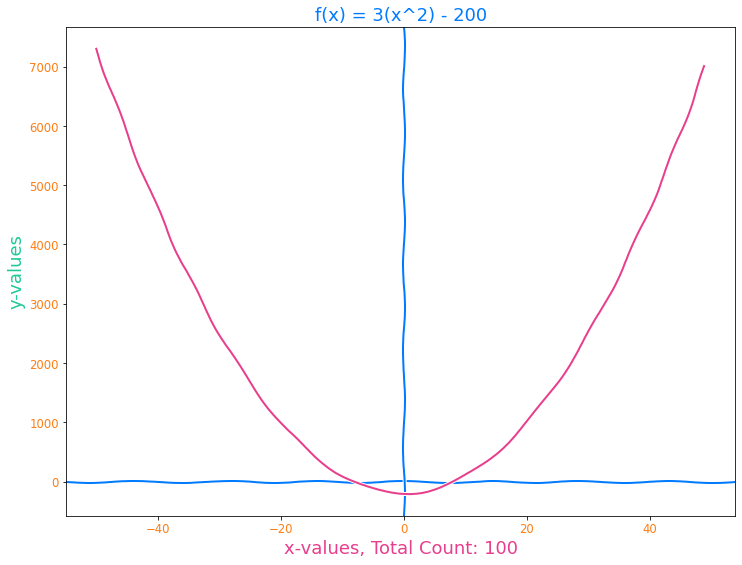

In [ ]:
# testing snoopy new trick
snoopy._ph()
snoopy._pp("Snoopy", "Plot equations")
snoopy._ph()
#
canvas, pic = snoopy.fetch_canvas()
coor = snoopy.fetch_data_math_equa_1()
snoopy.draw_graph_line_hand_drawn(pic,coor,lab="f(x) = 3(x^2) - 200")
canvas.show()

---------------------------------------- : ----------------------------------------
                                  Snoopy : Plot equations
---------------------------------------- : ----------------------------------------


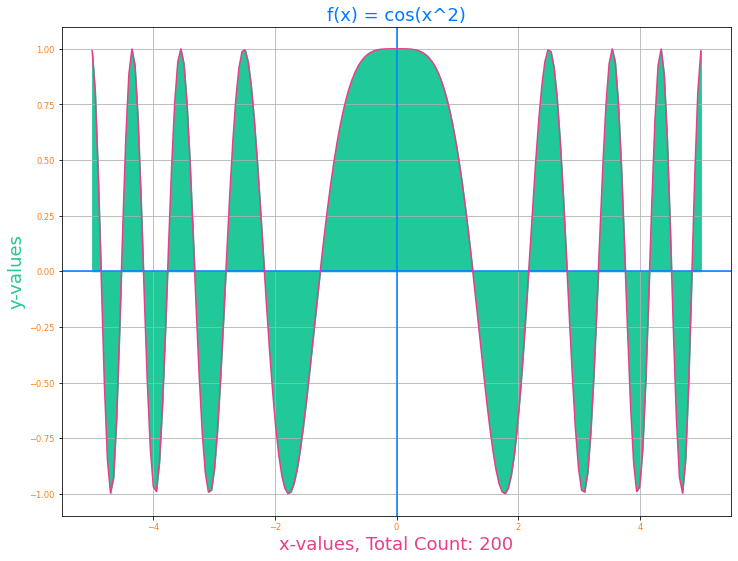

In [ ]:
# testing snoopy new trick
snoopy._ph()
snoopy._pp("Snoopy", "Plot equations")
snoopy._ph()
#
canvas, pic = snoopy.fetch_canvas()
coor = snoopy.fetch_data_math_equa_2(siz=200)
snoopy.draw_graph_area(pic,coor,lab="f(x) = cos(x^2)")
canvas.show()

---------------------------------------- : ----------------------------------------
                                  Snoopy : Plot equations
---------------------------------------- : ----------------------------------------


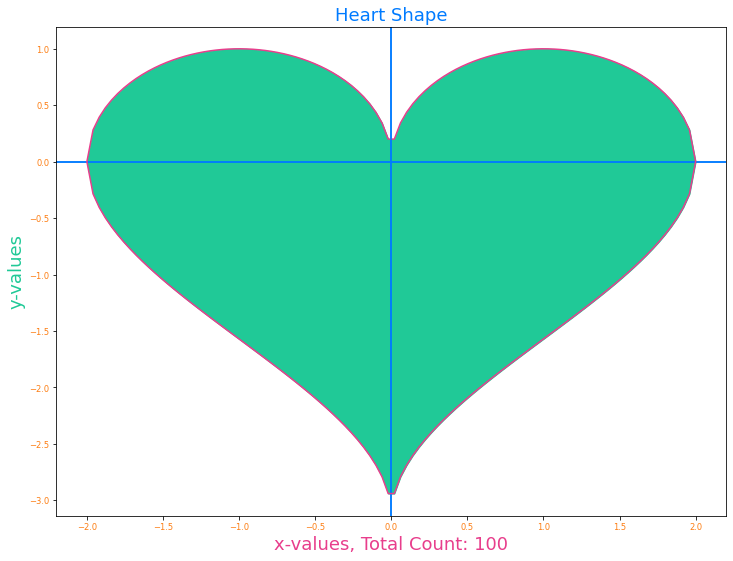

In [ ]:
# testing snoopy new trick
snoopy._ph()
snoopy._pp("Snoopy", "Plot equations")
snoopy._ph()
#
canvas, pic = snoopy.fetch_canvas()
coor1, coor2 = snoopy.fetch_data_math_heart()
snoopy.draw_graph_area(pic,coor1)
snoopy.draw_graph_area(pic,coor2,lab="Heart Shape")
canvas.show()

---------------------------------------- : ----------------------------------------
                                  Snoopy : Plot equations
---------------------------------------- : ----------------------------------------


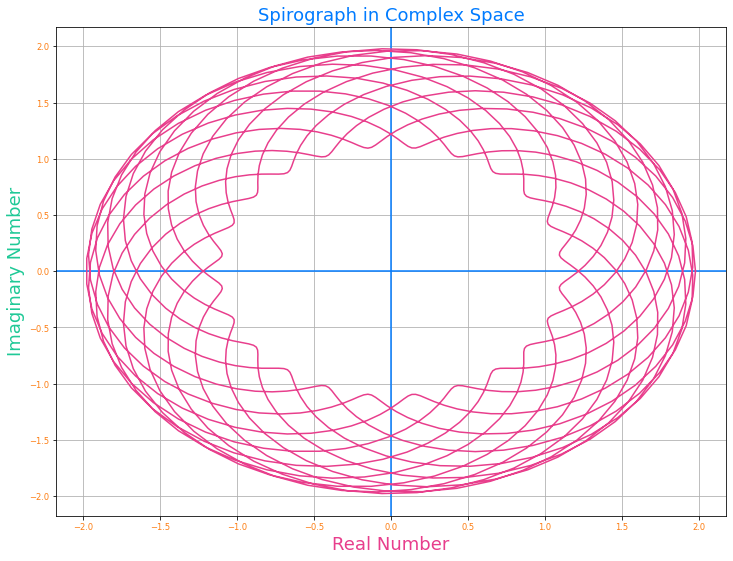

In [ ]:
# testing snoopy new trick
snoopy._ph()
snoopy._pp("Snoopy", "Plot equations")
snoopy._ph()
#
canvas, pic = snoopy.fetch_canvas()
coor = snoopy.fetch_data_math_spiro()
snoopy.draw_graph_line(pic,coor,lab="Spirograph in Complex Space")
snoopy.draw_graph_label(pic,xlab="Real Number",ylab="Imaginary Number")
canvas.show()

- The beauty of having a companion is that you can teach Snoopy to combine a bunch of tasks into one command.

- And so, "Snoopy, engage..."

In [ ]:
# snoopy engage
@add_method(p2go)
def engage(self):
  self._ph()
  self._pp("Snoopy", "Engage...")
  self._ph()
  #
  canvas, pic = self.fetch_canvas(row=2, col=2,siz=(18,12))
  coor = self.fetch_data_math_equa_1()
  self.draw_graph_line_hand_drawn(pic[0,0],coor,lab="f(x) = 3(x^2) - 200 (Hand-drawn style)")
  #
  coor = self.fetch_data_math_equa_2(siz=200)
  self.draw_graph_area(pic[0,1],coor,lab="f(x) = cos(x^2)")
  #
  coor1, coor2 = self.fetch_data_math_heart()
  self.draw_graph_area_hand_drawn(pic[1,0],coor1)
  self.draw_graph_area_hand_drawn(pic[1,0],coor2,lab="Heart Shape Hand-drawn style")
  #
  coor = self.fetch_data_math_spiro()
  self.draw_graph_line(pic[1,1],coor,lab="Spirograph in Complex Space")
  self.draw_graph_label(pic[1,1],xlab="Real Number",ylab="Imaginary Number")
  canvas.show()

---------------------------------------- : ----------------------------------------
                                  Snoopy : Engage...
---------------------------------------- : ----------------------------------------


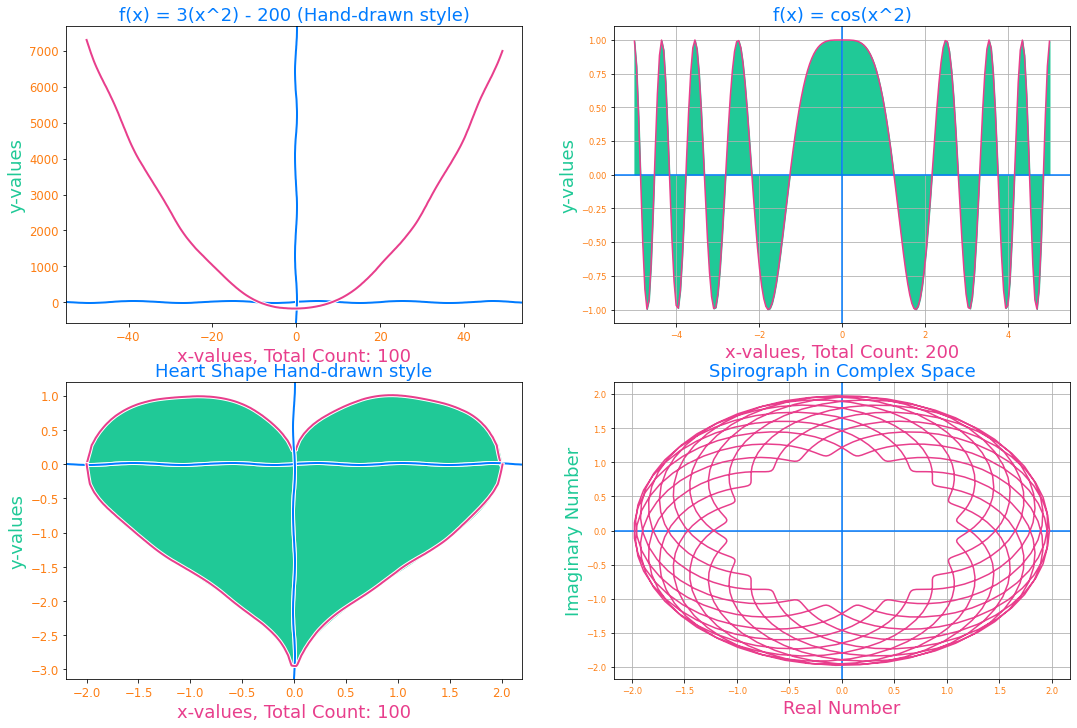

In [ ]:
# Snoopy engaging...
snoopy.engage()

## 2.2 Butterfly Bonus

- An AI Scientist friend emailed a beautiful "Butterfly parametric" equation after reading and hacking this notebook. She had improved and took the "p2go" in a fascinating direction. Furthermore, she did it half of the time it took me to write this notebook.

$$
x = sin(\tau) * (e^{cos(\tau)} - (2 * cos(4\tau)) - sin(\frac{\tau}{12})^5) \\
$$

- y


$$
y = cos(\tau) * (e^{cos(\tau)} - (2 * cos(4\tau)) - sin(\frac{\tau}{12})^5) \\
$$

- Tau

$$
0 < \tau < 12\pi
$$

In [ ]:
# butterfly
# from 0 to 12*pie
@add_method(p2go)
def fetch_data_math_butterfly(self, siz=1000):
  s = 0
  e = 12 * 3.1416
  t = numpy.linspace(s,e,siz)
  mx = numpy.ones((siz,2))
  for i in range(siz):
    mx[i,0] = (numpy.sin(t[i])*(numpy.exp(numpy.cos(t[i]))-2*numpy.cos(4*t[i])-numpy.sin(t[i]/12)**5))
    mx[i,1] = (numpy.cos(t[i])*(numpy.exp(numpy.cos(t[i]))-2*numpy.cos(4*t[i])-numpy.sin(t[i]/12)**5))
  return mx

---------------------------------------- : ----------------------------------------
                                  Snoopy : Plot equations
---------------------------------------- : ----------------------------------------


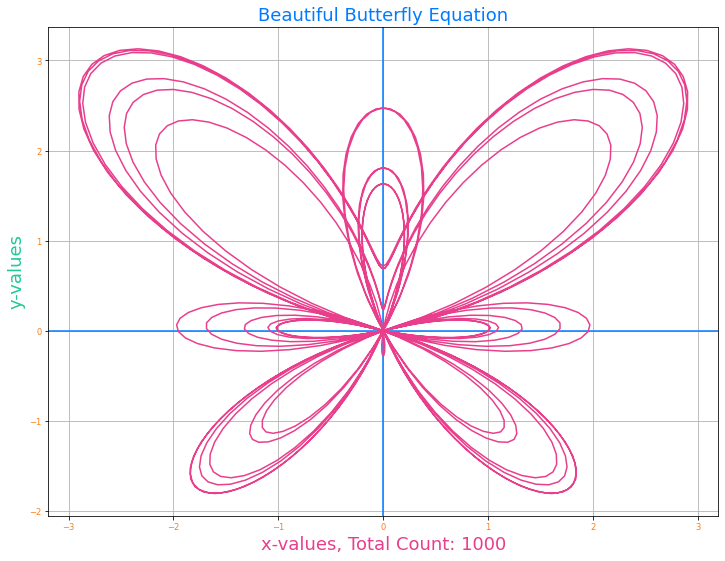

In [ ]:
# testing snoopy new trick
snoopy._ph()
snoopy._pp("Snoopy", "Plot equations")
snoopy._ph()
#
canvas, pic = snoopy.fetch_canvas()
coor = snoopy.fetch_data_math_butterfly()
snoopy.draw_graph_line(pic,coor,lab="Beautiful Butterfly Equation")
canvas.show()

## 2.3 Pie, Donuts and Nested Donuts Bonus Graph Section

- It is a day before Thanksgiving. An online-friend made a copy of this notebook, and he is happy hacking it, but he ran into trouble with the Pies and Donuts graph. The funny thing is that his email’s subject is “Pies and Donuts?”

- Snoopy and I initially thought it is for “free Mixed Berry pies and Old-fashing donuts,” Yums. :-)

- Reading through his Jupyter notebook, Snoopy spots his confusion. He was interlacing “fetching data” with “drawing graph” codes. 

- Snoopy refactors the “fetching data” function in one code-cell and putting the “drawing graph” method into another code-cell. It is the same throughout our journey. The logic becomes simple once Snoopy decoupled the data from the graph. 

- For the Pies and Donuts graph, the data structure is a one-dimension array. There is no need for the “X and Y” coordinate. Matplotlib is taking care of calculating the pie-percentage. The data follows the same format for the nested Donuts chart, i.e., a two-dimension array for two nested Donuts, a three-dimension array for three nested Donuts, and so on. 


In [ ]:
# Fetch Pie and donut data
@add_method(p2go)
def fetch_data_pie(self, size=6):
  # It can any complex calculation or 
  # fetcing csv-data using pandas.
  # the end result is a one-dimension array.
  #
  # For this example, Snoopy choose random number between 10 and 50
  mx = numpy.random.randint(10, 50, size=size, dtype=int)
  #
  mx_label = ["Banana", "Mixed Berry", "Blue Berry", "Cherry", "Apple", "Pecan"]
  return mx, mx_label
#
#
# Fetch double (nested) donut data
@add_method(p2go)
def fetch_data_double_donut(self, size=6):
  # It can any complex calculation or 
  # fetcing csv-data using pandas.
  # the end result is a two-dimension array for two nested donuts,
  # or three-dimension array for three nested donut, and so on.
  #
  # For this example, Snoopy choose random number between 10 and 50
  mx = numpy.zeros((size, 2))
  mx[:,0] = numpy.random.randint(10, 50, size=size, dtype=int)
  mx[:,1] = numpy.random.randint(10, 50, size=size, dtype=int)
  #
  mx_label = ["Banana", "Mixed Berry", "Blue Berry", "Cherry", "Apple", "Pecan"]
  return mx, mx_label

In [5]:
import numpy
mx = numpy.random.randint(10, 50, size=6, dtype=int)
try:
  row,col = mx.shape
except:
  col = 1
col

1

In [ ]:
# draw pie
@add_method(p2go)
def draw_graph_pie(self, is_donut=False, start_angle=90,donut_data=None, donut_label=None,color=None):
  # set up
  canvas, pic = self.fetch_canvas()
  if (donut_data is None):
    mx, mx_label = self.fetch_data_pie()
    col = 1
  else:
    mx = donut_data
    mx_label = donut_label
    row, col = mx.shape
  #
  if (color is None):
    icolor = self.color_pastel
  else:
    icolor = color
  if (is_donut == True):
    donut_hole = 0.25
    head = "Fruit Donut"
  else:
    donut_hole = 1 # same size as the "radius", so NO hole.
    head = "Fruid Pie"
  # header
  self._ph()
  self._pp("Draw", head)
  self._ph()
  #
  # check for nested donut by looking at the size of the array
  if (col == 1):
    pic.pie(mx, labels=mx_label, autopct='%1.1f%%', shadow=True, colors=icolor,
      startangle=start_angle, radius=1, wedgeprops=dict(width=donut_hole, edgecolor='w'))
  else:
    pic.pie(mx[:,0], labels=mx_label, autopct='%1.1f%%', shadow=True, colors=icolor,
      startangle=start_angle, radius=1, wedgeprops=dict(width=donut_hole, edgecolor='w'))
    #
    # for inner donut, draw donut with smaller "radius" size, i.e. smaller donut.
    small_pie = 1 - donut_hole
    pic.pie(mx[:,1], labels=mx_label, autopct='%1.1f%%', shadow=True, colors=icolor,
      startangle=start_angle, radius=small_pie, wedgeprops=dict(width=donut_hole, edgecolor='w'))
  #
  pic.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
  canvas.show()
  return

---------------------------------------- : ----------------------------------------
                                    Draw : Fruid Pie
---------------------------------------- : ----------------------------------------


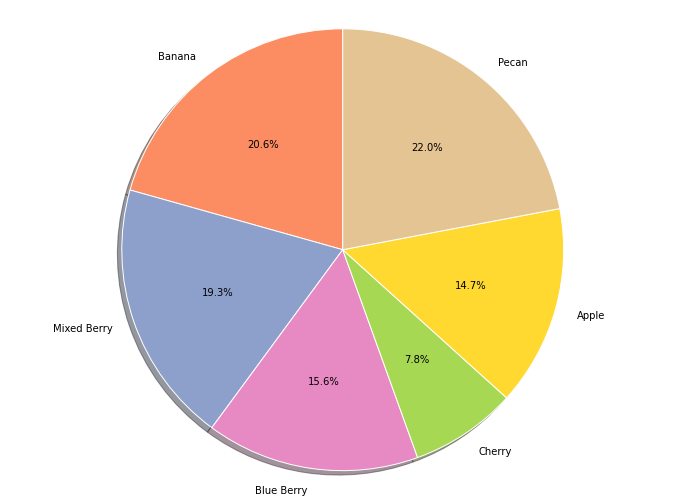

In [ ]:
# do it, draw pie
snoopy.draw_graph_pie()

---------------------------------------- : ----------------------------------------
                                    Draw : Fruit Donut
---------------------------------------- : ----------------------------------------


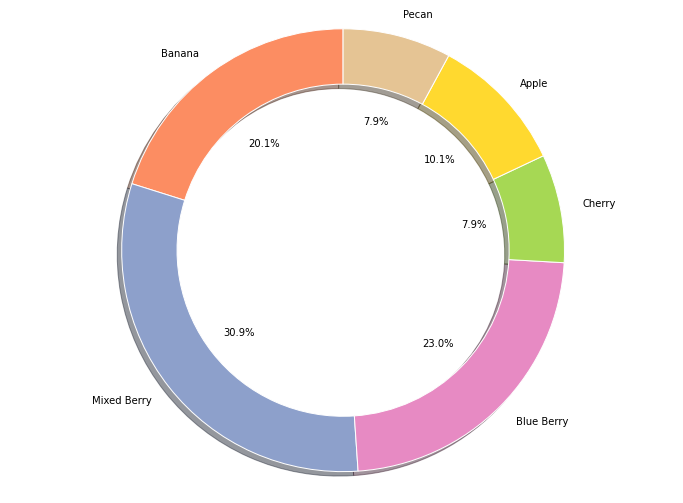

In [ ]:
# draw donut
snoopy.draw_graph_pie(is_donut=True)

- That is easy-peasy-lemon-squeezy.

- Draw double (nested) donuts please

---------------------------------------- : ----------------------------------------
                                    Draw : Fruit Donut
---------------------------------------- : ----------------------------------------


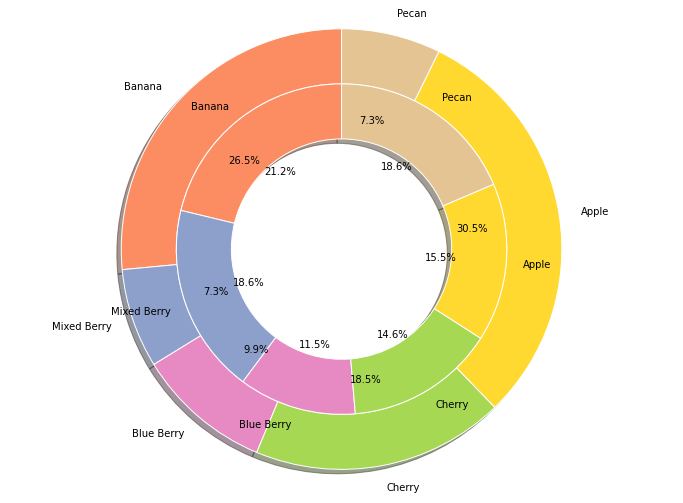

In [ ]:
# draw double (nested donut)
data, label = snoopy.fetch_data_double_donut()
snoopy.draw_graph_pie(is_donut=True,donut_data=data, donut_label=label)

# 3 - Conclusion

I love spending time doing fun "sandbox" or "toy" projects. I can focus on one problem, and Jupyter notebooks make it easy to document the journey and share it with my friends, both real and virtual. 


After leaving the rules-based expert-systems behind when I left Xerox PARC in my early youth, I am delighted to return to AI. It is due in large part by Jeremy Howard, Rachel Thomas, and Sylvain Gugger's courses. Their style of demystifying AI using code, and yet not dummy down, is one of the best I have learned. 


If you read this on Jupyter notebook, I hope you have hacked the hell of it and created your specialized drawing-graph companion. The one request is you heading over to LinkedIn, giving a thumbs-up, and sending me a message. 

"Demystify Python Charts -- A Hackable Step-by-step Jupyter Notebook", https://www.linkedin.com/pulse/demystify-python-charts-hackable-step-by-step-jupyter-duc-haba


If you read this on LinkedIn, what are you waiting for? Heading over to Github, using Google Collab or your favorite Jupyter notebook option, and hacking away.
https://github.com/duchaba/python_graphs_p2go


In [ ]:
# end of jupyter notebook